# Football match result prediction

My goal is to create a classification model to predict football result based on data available before the game. Moreover I will compare my prediction with bettings odds and calculate if it is possible to earn some money on football match betting.

## Dataset:
* Last 10 completed seasons
* Top 5 European Leauges
    * England Premier League
    * Germany Bundesliga
    * Spain La Liga
    * Italy Serie A
    * French Ligue 1
    
## Variables
* All variables are described in a separate file: **Variable description.xlsx**

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy import stats

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble  import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

## Upload datasets

In [3]:
EPL = pd.read_csv("Final_data/BPL_data_final.csv")
LaLiga = pd.read_csv("Final_data/LaLiga_data_final.csv")
SerieA = pd.read_csv("Final_data/SerieA_data_final.csv")
Ligue1 = pd.read_csv("Final_data/Ligue1_data_final.csv")
Bundesliga = pd.read_csv("Final_data/Bundesliga_data_final.csv")

In [4]:
DATA = pd.concat([EPL, LaLiga, SerieA, Ligue1, Bundesliga], ignore_index=True)

In [5]:
del EPL, LaLiga, SerieA, Ligue1, Bundesliga

In [6]:
pd.set_option("display.max_columns", None)
DATA

,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,HT_last_matches_number,AT_last_matches_number,B365H,B365D,B365A,B365_HD,B365_AD,HTGS,ATGS,HTGC,ATGC,HT_Shots_OT_took,AT_Shots_OT_took,HT_Shots_OT_allowed,AT_Shots_OT_allowed,HT_Shots_took_Acc,AT_Shots_took_Acc,HT_Shots_allowed_Acc,AT_Shots_allowed_Acc,HT_Pts,AT_Pts,HT_cum_wins,AT_cum_wins,HT_cum_losses,AT_cum_losses,HT_cum_draws,AT_cum_draws,Off_strength_HT,Def_strength_HT,Off_strength_AT,Def_strength_AT,HT_last_match1,AT_last_match1,HT_last_match2,AT_last_match2,HT_last_match3,AT_last_match3,HT_last_match4,AT_last_match4,HT_last_match5,AT_last_match5,HT_3match_FormPtsStr,AT_3match_FormPtsStr,HT_5match_FormPtsStr,AT_5match_FormPtsStr,HT_3match_FormPts,AT_3match_FormPts,HT_5match_FormPts,AT_5match_FormPts,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HT_last_LP,AT_last_LP,Is_HT_newTeam,Is_AT_newTeam,H2H_Home,H2H_Away,H2H_Home_pts,H2H_Away_pts,HomeTeam_TM_avg_age,HomeTeam_TM_foreigners_number,HomeTeam_TM_avg_market_value_MLN_EUR,HomeTeam_TM_total_market_value_MLN_EUR,AwayTeam_TM_avg_age,AwayTeam_TM_foreigners_number,AwayTeam_TM_avg_market_value_MLN_EUR,AwayTeam_TM_total_market_value_MLN_EUR
0,E0,2011/12,2011-08-13,Blackburn,Wolves,1.0,2.0,A,16.0,13.0,8.0,4.0,0,0,2.20,3.20,3.50,1.30,1.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,NDNDND,NDNDND,NDNDNDNDND,NDNDNDNDND,3,3,5,5,0,0,0,0,0,0,0,0,15.0,17.0,0.0,0.0,WDW,LDL,7,1,25.4,26.0,2.16,80.00,25.0,24.0,2.11,78.05
1,E0,2011/12,2011-08-13,Fulham,Aston Villa,0.0,0.0,D,13.0,7.0,9.0,1.0,0,0,2.20,3.20,3.50,1.30,1.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,NDNDND,NDNDND,NDNDNDNDND,NDNDNDNDND,3,3,5,5,0,0,0,0,0,0,0,0,8.0,9.0,0.0,0.0,LDD,WDD,2,5,27.1,28.0,2.78,100.00,25.6,23.0,3.34,123.50
2,E0,2011/12,2011-08-13,Liverpool,Sunderland,1.0,1.0,D,11.0,15.0,4.0,6.0,0,0,1.57,3.60,7.00,1.09,2.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,NDNDND,NDNDND,NDNDNDNDND,NDNDNDNDND,3,3,5,5,0,0,0,0,0,0,0,0,6.0,10.0,0.0,0.0,WDW,LDL,7,1,25.6,18.0,7.64,236.90,25.5,20.0,3.51,126.50
3,E0,2011/12,2011-08-13,Newcastle,Arsenal,0.0,0.0,D,6.0,9.0,1.0,4.0,0,0,3.75,3.25,2.10,1.74,1.28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,NDNDND,NDNDND,NDNDNDNDND,NDNDNDNDND,3,3,5,5,0,0,0,0,0,0,0,0,12.0,4.0,0.0,0.0,LWD,WLD,4,4,24.8,21.0,4.37,161.70,24.2,35.0,8.05,362.43
4,E0,2011/12,2011-08-13,QPR,Bolton,0.0,4.0,A,13.0,13.0,7.0,7.0,0,0,2.40,3.25,3.00,1.38,1.56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,NDNDND,NDNDND,NDNDNDNDND,NDNDNDNDND,3,3,5,5,0,0,0,0,0,0,0,0,21.0,14.0,1.0,0.0,ND,ND,1,1,27.6,25.0,1.70,81.38,25.9,19.0,2.37,90.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18154,D1,2020/21,2021-05-22,Hoffenheim,Hertha,2.0,1.0,H,21.0,9.0,5.0,5.0,33,33,1.90,3.80,3.80,1.27,1.90,50.0,40.0,53.0,50.0,161.0,153.0,147.0,143.0,0.310559,0.261438,0.360544,0.349650,40,35,10.0,8.0,13.0,14.0,10.0,11.0,1.129564,1.067344,0.881719,0.903651,D,D,W,W,D,D,W,W,D,D,DWD,DWD,DWDWD,DWDWD,5,5,9,9,0,0,0,0,0,0,0,0,6.0,10.0,0.0,0.0,WLW,LWL,6,3,25.1,25.0,6.17,228.15,24.4,21.0,6.02,228.88
18155,D1,2020/21,2021-05-22,Stuttgart,Bielefeld,0.0,2.0,A,11.0,11.0,0.0,3.0,33,33,2.37,3.75,2.75,1.45,1.59,56.0,24.0,53.0,52.0,162.0,100.0,173.0,184.0,0.345679,0.240000,0.306358,0.282609,45,32,12.0,8.0,12.0,17.0,9.0,8.0,1.016608,1.113750,0.510469,1.091912,W,D,W,D,L,L,L,W,L,D

In [7]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18159 entries, 0 to 18158
Data columns (total 85 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Div                                     18159 non-null  object 
 1   Season                                  18159 non-null  object 
 2   Date                                    18159 non-null  object 
 3   HomeTeam                                18159 non-null  object 
 4   AwayTeam                                18159 non-null  object 
 5   FTHG                                    18159 non-null  float64
 6   FTAG                                    18159 non-null  float64
 7   FTR                                     18159 non-null  object 
 8   HS                                      18159 non-null  float64
 9   AS                                      18159 non-null  float64
 10  HST                                     18159 non-null  fl

In [8]:
DATA.describe()

,FTHG,FTAG,HS,AS,HST,AST,HT_last_matches_number,AT_last_matches_number,B365H,B365D,B365A,B365_HD,B365_AD,HTGS,ATGS,HTGC,ATGC,HT_Shots_OT_took,AT_Shots_OT_took,HT_Shots_OT_allowed,AT_Shots_OT_allowed,HT_Shots_took_Acc,AT_Shots_took_Acc,HT_Shots_allowed_Acc,AT_Shots_allowed_Acc,HT_Pts,AT_Pts,HT_cum_wins,AT_cum_wins,HT_cum_losses,AT_cum_losses,HT_cum_draws,AT_cum_draws,Off_strength_HT,Def_strength_HT,Off_strength_AT,Def_strength_AT,HT_3match_FormPts,AT_3match_FormPts,HT_5match_FormPts,AT_5match_FormPts,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HT_last_LP,AT_last_LP,Is_HT_newTeam,Is_AT_newTeam,H2H_Home_pts,H2H_Away_pts,HomeTeam_TM_avg_age,HomeTeam_TM_foreigners_number,HomeTeam_TM_avg_market_value_MLN_EUR,HomeTeam_TM_total_market_value_MLN_EUR,AwayTeam_TM_avg_age,AwayTeam_TM_foreigners_number,AwayTeam_TM_avg_market_value_MLN_EUR,AwayTeam_TM_total_market_value_MLN_EUR
count,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.00000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,17657.000000,17662.000000,17658.000000,17659.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,17179.000000,17179.000000,17179.000000,17179.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.00000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,1.544083,1.193788,13.658131,11.074509,5.022083,4.063935,18.085247,18.085577,2.755590,4.015556,4.74197,1.480792,2.031210,24.448538,24.613855,24.613966,24.424913,81.683848,82.160251,82.142739,81.667713,0.300162,0.300621,0.302535,0.302483,24.707418,24.934192,6.693706,6.767608,6.765240,6.686602,4.626301,4.631367,1.000011,1.002035,1.001026,0.998408,3.917782,4.201663,6.586706,6.843659,0.059640,0.019329,0.063935,0.011785,0.07561,0.021587,0.051435,0.010243,10.780439,10.782202,0.142464,0.142464,3.649540,3.876039,25.321923,18.856765,5.463507,204.003366,25.321929,18.856325,5.462532,203.968073
std,1.309401,1.161131,5.209202,4.566384,2.751004,2.412116,10.782794,10.781468,2.039846,1.383579,4.13618,0.583953,1.129344,17.694996,17.700007,16.507439,16.462485,55.486014,55.538687,53.912359,53.840734,0.092331,0.091100,0.089487,0.091876,17.818640,17.829547,5.347081,5.351153,5.168524,5.161077,3.401325,3.406440,0.478693,0.454190,0.495792,0.419322,2.360834,2.399557,3.249198,3.267856,0.236825,0.137683,0.244644,0.107919,0.26438,0.145335,0.220888,0.100690,6.426706,6.426311,0.349535,0.349535,2.562316,2.581441,1.050928,6.587982,5.567648,209.467146,1.050788,6.587913,5.566175,209.420364
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.020000,1.730000,1.08000,0.960000,0.980000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.613000,18.400000,22.000000,0.000000,0.613000,18.400000
25%,1.000000,0.000000,10.000000,8.000000,3.000000,2.000000,9.000000,9.000000,1.670000,3.300000,2.45000,1.160000,1.400000,11.000000,11.000000,11.000000,11.000000,37.000000,37.000000,38.000000,37.000000,0.250000,0.250000,0.256410,0.255814,10.000000,11.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,0.695923,0.721319,0.693492,0.744066,2.000000,3.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,5.000000,5.000000,0.000000,0.0

## Basic goals analysis

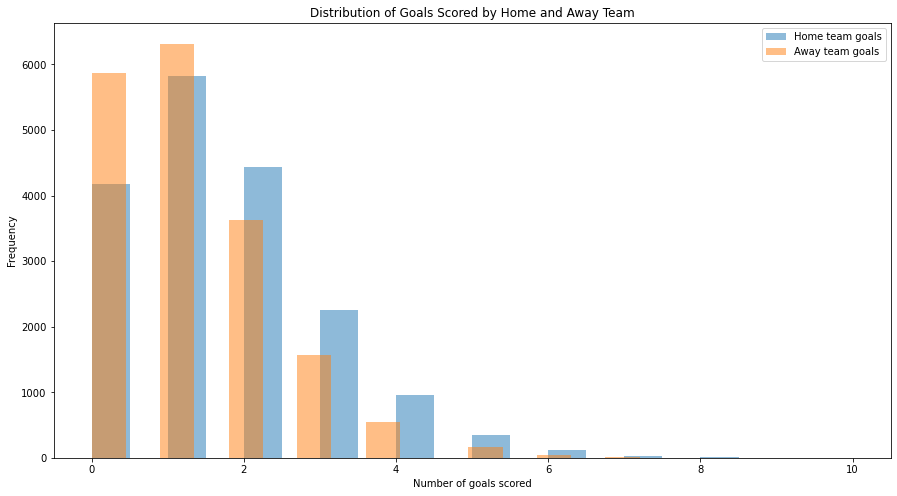

In [9]:
plt.figure(figsize=(15,8))
plt.hist(DATA.FTHG, alpha=0.5, label='Home team goals', bins=20)
plt.hist(DATA.FTAG, alpha=0.5, label='Away team goals', bins=20)
plt.legend()
plt.title('Distribution of Goals Scored by Home and Away Team')
plt.ylabel('Frequency')
plt.xlabel('Number of goals scored')
plt.show()

As you can see, both Home and Away team usually score 1 goal. Moreover away teams have more games when they don't score any goals. Based on the information in the chart, you can conclude that the home team wins more often.

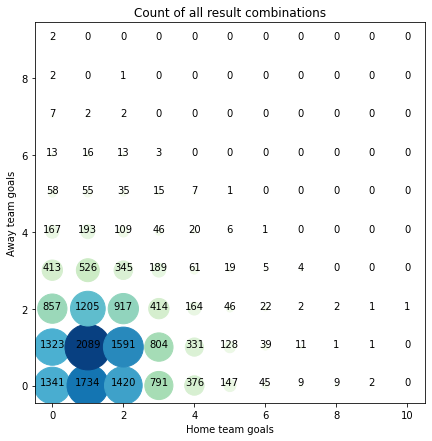

In [10]:
c = pd.crosstab(index=DATA.FTHG, columns=DATA.FTAG).stack().reset_index(name='count')

#sc = c.plot.scatter('FTHG', 'FTAG', s=c['count'], figsize=(10,8), c=c['count'], cmap='GnBu')

plt.figure(figsize=(7,7))
plt.scatter(c['FTHG'], c['FTAG'], s=c['count'],c=c['count'], cmap='GnBu')

for i, txt in enumerate(c['count']):
    plt.annotate(txt, (c['FTHG'][i], c['FTAG'][i]), ha='center')

#plt.xticks(c['FTHG'])
#plt.yticks(c['FTAG'])
plt.xlabel('Home team goals')
plt.ylabel('Away team goals')
plt.title('Count of all result combinations')
plt.show()

The most common match result is 1-1. On the second place is 1-0 and then it is 2-1 (both for home team)

I am only interested in statistics that we have access to before a given match, so we can remove some columns that contain statistics from a specific match

In [11]:
DATA_cleaned = DATA.drop(['FTHG', 'FTAG', 'HS', 'AS', 'HST', 'AST'], axis=1)

In [12]:
del DATA

## Missing data

In [13]:
missing_data = DATA_cleaned.isna().sum()
missing_data[missing_data > 0]

HT_Shots_took_Acc       502
AT_Shots_took_Acc       497
HT_Shots_allowed_Acc    501
AT_Shots_allowed_Acc    500
Off_strength_HT         980
Def_strength_HT         980
Off_strength_AT         980
Def_strength_AT         980
dtype: int64

Checking missing data in dataset which don't contain first 5 matchweeks. According to the scripts with dataset creation only here problems may arise.

In [14]:
DATA_WO_5 = DATA_cleaned[(DATA_cleaned.HT_last_matches_number >= 5) & (DATA_cleaned.AT_last_matches_number >= 5)]
DATA_WO_5.shape

(15695, 79)

In [15]:
DATA_WO_5.isna().sum()[DATA_WO_5.isna().sum() > 0]

Series([], dtype: int64)

In [16]:
del DATA_WO_5

Deleting first 5 matchweeks makes that missing data is not a problem anymore. But with this intervetion I lost around 2.5 thousands of records. It is about 14% of all data so it is not a good practice to delete all of them

Let's check columns with missing data

In [17]:
DATA_cleaned[(DATA_cleaned[['HT_Shots_took_Acc', 'AT_Shots_took_Acc', 'HT_Shots_allowed_Acc', 'AT_Shots_allowed_Acc']].isna().any(axis=1)) 
             & (DATA_cleaned.Div == 'E0')]

,Div,Season,Date,HomeTeam,AwayTeam,FTR,HT_last_matches_number,AT_last_matches_number,B365H,B365D,B365A,B365_HD,B365_AD,HTGS,ATGS,HTGC,ATGC,HT_Shots_OT_took,AT_Shots_OT_took,HT_Shots_OT_allowed,AT_Shots_OT_allowed,HT_Shots_took_Acc,AT_Shots_took_Acc,HT_Shots_allowed_Acc,AT_Shots_allowed_Acc,HT_Pts,AT_Pts,HT_cum_wins,AT_cum_wins,HT_cum_losses,AT_cum_losses,HT_cum_draws,AT_cum_draws,Off_strength_HT,Def_strength_HT,Off_strength_AT,Def_strength_AT,HT_last_match1,AT_last_match1,HT_last_match2,AT_last_match2,HT_last_match3,AT_last_match3,HT_last_match4,AT_last_match4,HT_last_match5,AT_last_match5,HT_3match_FormPtsStr,AT_3match_FormPtsStr,HT_5match_FormPtsStr,AT_5match_FormPtsStr,HT_3match_FormPts,AT_3match_FormPts,HT_5match_FormPts,AT_5match_FormPts,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HT_last_LP,AT_last_LP,Is_HT_newTeam,Is_AT_newTeam,H2H_Home,H2H_Away,H2H_Home_pts,H2H_Away_pts,HomeTeam_TM_avg_age,HomeTeam_TM_foreigners_number,HomeTeam_TM_avg_market_value_MLN_EUR,HomeTeam_TM_total_market_value_MLN_EUR,AwayTeam_TM_avg_age,AwayTeam_TM_foreigners_number,AwayTeam_TM_avg_market_value_MLN_EUR,AwayTeam_TM_total_market_value_MLN_EUR
0,E0,2011/12,2011-08-13,Blackburn,Wolves,A,0,0,2.20,3.20,3.50,1.30,1.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,NDNDND,NDNDND,NDNDNDNDND,NDNDNDNDND,3,3,5,5,0,0,0,0,0,0,0,0,15.0,17.0,0.0,0.0,WDW,LDL,7,1,25.4,26.0,2.16,80.00,25.0,24.0,2.11,78.05
1,E0,2011/12,2011-08-13,Fulham,Aston Villa,D,0,0,2.20,3.20,3.50,1.30,1.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,NDNDND,NDNDND,NDNDNDNDND,NDNDNDNDND,3,3,5,5,0,0,0,0,0,0,0,0,8.0,9.0,0.0,0.0,LDD,WDD,2,5,27.1,28.0,2.78,100.00,25.6,23.0,3.34,123.50
2,E0,2011/12,2011-08-13,Liverpool,Sunderland,D,0,0,1.57,3.60,7.00,1.09,2.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,NDNDND,NDNDND,NDNDNDNDND,NDNDNDNDND,3,3,5,5,0,0,0,0,0,0,0,0,6.0,10.0,0.0,0.0,WDW,LDL,7,1,25.6,18.0,7.64,236.90,25.5,20.0,3.51,126.50
3,E0,2011/12,2011-08-13,Newcastle,Arsenal,D,0,0,3.75,3.25,2.10,1.74,1.28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,NDNDND,NDNDND,NDNDNDNDND,NDNDNDNDND,3,3,5,5,0,0,0,0,0,0,0,0,12.0,4.0,0.0,0.0,LWD,WLD,4,4,24.8,21.0,4.37,161.70,24.2,35.0,8.05,362.43
4,E0,2011/12,2011-08-13,QPR,Bolton,A,0,0,2.40,3.25,3.00,1.38,1.56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,NDNDND,NDNDND,NDNDNDNDND,NDNDNDNDND,3,3,5,5,0,0,0,0,0,0,0,0,21.0,14.0,1.0,0.0,ND,ND,1,1,27.6,25.0,1.70,81.38,25.9,19.0,2.37,90.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3427,E0,2020/21,2020-09-14,Sheffield United,Wolves,A,0,0,3.25,3.10,2.37,1.59,1.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,NDNDND,NDNDND,NDNDNDNDND,NDNDNDNDND,3,3,5,5,0,0,0,0,0,0,0,0,9.0,7.0,0.0,0.0,DW,DL,4,1,24.9,14.0,3.75,149.85,23.9,32.0,11.85,450.30
3430,E0,2020/21,2020-09-19,Man United,Crystal Palace,A,0,1,1.30,5.50,9.50,1.05,3.48,0.0,1.0,0.0,0.0,0.0,3.0,0.0,5.0,NaN,0.333333,NaN,0.0,0,3,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,ND,W,ND,ND,ND,ND,ND,ND,ND,ND,NDNDND,WNDND,NDNDNDNDND,WNDNDNDND,3,5,5,7,0,0,0,0,0,0,0,0,3.0,14.0,0.0,0.0,WLW,LWL,6,3,24.9,24.0,19.74,770.05,27.7,18.0,5.38,193.85
3435,E0,2020/21,2020-09-20,Leicester,Burnley,H,1,0,1.61,4.00,5.50,1.15,2.32,3.0,0.0,0.0,0.0,7.0,0.0,1.0,0.0,0.428571,NaN,0.0,NaN,3,0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,

Missing data in these variables occur due to the fact that 0/0 division is impossible. Therefore, the missing data in this case can be filled with 0

In [18]:
DATA_cleaned[(DATA_cleaned[['Off_strength_HT', 'Def_strength_HT', 'Off_strength_AT', 'Def_strength_AT']].isna().any(axis=1)) 
             & (DATA_cleaned.Div == 'E0')]

,Div,Season,Date,HomeTeam,AwayTeam,FTR,HT_last_matches_number,AT_last_matches_number,B365H,B365D,B365A,B365_HD,B365_AD,HTGS,ATGS,HTGC,ATGC,HT_Shots_OT_took,AT_Shots_OT_took,HT_Shots_OT_allowed,AT_Shots_OT_allowed,HT_Shots_took_Acc,AT_Shots_took_Acc,HT_Shots_allowed_Acc,AT_Shots_allowed_Acc,HT_Pts,AT_Pts,HT_cum_wins,AT_cum_wins,HT_cum_losses,AT_cum_losses,HT_cum_draws,AT_cum_draws,Off_strength_HT,Def_strength_HT,Off_strength_AT,Def_strength_AT,HT_last_match1,AT_last_match1,HT_last_match2,AT_last_match2,HT_last_match3,AT_last_match3,HT_last_match4,AT_last_match4,HT_last_match5,AT_last_match5,HT_3match_FormPtsStr,AT_3match_FormPtsStr,HT_5match_FormPtsStr,AT_5match_FormPtsStr,HT_3match_FormPts,AT_3match_FormPts,HT_5match_FormPts,AT_5match_FormPts,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HT_last_LP,AT_last_LP,Is_HT_newTeam,Is_AT_newTeam,H2H_Home,H2H_Away,H2H_Home_pts,H2H_Away_pts,HomeTeam_TM_avg_age,HomeTeam_TM_foreigners_number,HomeTeam_TM_avg_market_value_MLN_EUR,HomeTeam_TM_total_market_value_MLN_EUR,AwayTeam_TM_avg_age,AwayTeam_TM_foreigners_number,AwayTeam_TM_avg_market_value_MLN_EUR,AwayTeam_TM_total_market_value_MLN_EUR
0,E0,2011/12,2011-08-13,Blackburn,Wolves,A,0,0,2.20,3.20,3.50,1.30,1.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,NDNDND,NDNDND,NDNDNDNDND,NDNDNDNDND,3,3,5,5,0,0,0,0,0,0,0,0,15.0,17.0,0.0,0.0,WDW,LDL,7,1,25.4,26.0,2.16,80.00,25.0,24.0,2.11,78.05
1,E0,2011/12,2011-08-13,Fulham,Aston Villa,D,0,0,2.20,3.20,3.50,1.30,1.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,NDNDND,NDNDND,NDNDNDNDND,NDNDNDNDND,3,3,5,5,0,0,0,0,0,0,0,0,8.0,9.0,0.0,0.0,LDD,WDD,2,5,27.1,28.0,2.78,100.00,25.6,23.0,3.34,123.50
2,E0,2011/12,2011-08-13,Liverpool,Sunderland,D,0,0,1.57,3.60,7.00,1.09,2.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,NDNDND,NDNDND,NDNDNDNDND,NDNDNDNDND,3,3,5,5,0,0,0,0,0,0,0,0,6.0,10.0,0.0,0.0,WDW,LDL,7,1,25.6,18.0,7.64,236.90,25.5,20.0,3.51,126.50
3,E0,2011/12,2011-08-13,Newcastle,Arsenal,D,0,0,3.75,3.25,2.10,1.74,1.28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,NDNDND,NDNDND,NDNDNDNDND,NDNDNDNDND,3,3,5,5,0,0,0,0,0,0,0,0,12.0,4.0,0.0,0.0,LWD,WLD,4,4,24.8,21.0,4.37,161.70,24.2,35.0,8.05,362.43
4,E0,2011/12,2011-08-13,QPR,Bolton,A,0,0,2.40,3.25,3.00,1.38,1.56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,NDNDND,NDNDND,NDNDNDNDND,NDNDNDNDND,3,3,5,5,0,0,0,0,0,0,0,0,21.0,14.0,1.0,0.0,ND,ND,1,1,27.6,25.0,1.70,81.38,25.9,19.0,2.37,90.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3437,E0,2020/21,2020-09-21,Wolves,Man City,A,1,0,6.50,4.33,1.50,2.60,1.11,2.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,0.500000,NaN,0.000000,NaN,3,0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,W,ND,ND,ND,ND,ND,ND,ND,ND,ND,WNDND,NDNDND,WNDNDNDND,NDNDNDNDND,5,3,7,5,0,0,0,0,0,0,0,0,7.0,2.0,0.0,0.0,LWW,WLL,6,3,23.9,32.0,11.85,450.30,24.9,23.0,29.01,1040.00
3438,E0,2020/21,2020-09-26,Brighton,Man United,A,2,1,4.75,3.75,1.72,2.10,1.18,4.0,1.0,3.0,3.0,9.0,4.0,5.0,5.0,0.444444,0.250000,0.600000,0.600000,3,0,1.0,0.0,1.0,1.0,0.0,0.0,0.692308,1.317073,NaN,NaN,W,L,L,ND,ND,ND,ND,ND,ND,ND,WLND,LNDND,WLNDNDND,LNDNDNDND,4,2,6,4,0,0,0,0,0,0,0,0,15.0,3.0,0.0,0.0,LLL,WWW,0,9,24.3,28.0,6.31,290.40,24.9,24.0,19.74,770.05
3441,E0,2020/21,2020-09-26,Burnley,Southampton,A,1,2,3.20,3.30,2.30,1.62,1.36,2.0,2.0,4.0,6.0,5.0,12.0,6.0,9.0,0.400000,0.166667,0.666667,0.666667,0,

Missing data for these variables is due to an insufficient number of previously played home or away matches by both the home and the away team ([reference](https://help.smarkets.com/hc/en-gb/articles/115001457989-How-to-calculate-Poisson-distribution-for-football-betting)). Therefore, in this case, we can fill the missing data with the number 1, which means that the offensive and defensive strength do not differ from the league averages

In [19]:
DATA_cleaned.fillna({
    'HT_Shots_took_Acc': 0, 
    'AT_Shots_took_Acc': 0, 
    'HT_Shots_allowed_Acc': 0, 
    'AT_Shots_allowed_Acc': 0,
    'Off_strength_HT': 1, 
    'Def_strength_HT': 1, 
    'Off_strength_AT': 1, 
    'Def_strength_AT': 1
}, inplace=True)

In [20]:
DATA_cleaned.isna().sum()[DATA_cleaned.isna().sum() > 0]

Series([], dtype: int64)

In [21]:
DATA_cleaned[DATA_cleaned.isna().any(axis=1)]

,Div,Season,Date,HomeTeam,AwayTeam,FTR,HT_last_matches_number,AT_last_matches_number,B365H,B365D,B365A,B365_HD,B365_AD,HTGS,ATGS,HTGC,ATGC,HT_Shots_OT_took,AT_Shots_OT_took,HT_Shots_OT_allowed,AT_Shots_OT_allowed,HT_Shots_took_Acc,AT_Shots_took_Acc,HT_Shots_allowed_Acc,AT_Shots_allowed_Acc,HT_Pts,AT_Pts,HT_cum_wins,AT_cum_wins,HT_cum_losses,AT_cum_losses,HT_cum_draws,AT_cum_draws,Off_strength_HT,Def_strength_HT,Off_strength_AT,Def_strength_AT,HT_last_match1,AT_last_match1,HT_last_match2,AT_last_match2,HT_last_match3,AT_last_match3,HT_last_match4,AT_last_match4,HT_last_match5,AT_last_match5,HT_3match_FormPtsStr,AT_3match_FormPtsStr,HT_5match_FormPtsStr,AT_5match_FormPtsStr,HT_3match_FormPts,AT_3match_FormPts,HT_5match_FormPts,AT_5match_FormPts,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HT_last_LP,AT_last_LP,Is_HT_newTeam,Is_AT_newTeam,H2H_Home,H2H_Away,H2H_Home_pts,H2H_Away_pts,HomeTeam_TM_avg_age,HomeTeam_TM_foreigners_number,HomeTeam_TM_avg_market_value_MLN_EUR,HomeTeam_TM_total_market_value_MLN_EUR,AwayTeam_TM_avg_age,AwayTeam_TM_foreigners_number,AwayTeam_TM_avg_market_value_MLN_EUR,AwayTeam_TM_total_market_value_MLN_EUR


'ND' values in HT/AT_last_match_[number] variables indicate no match results data. This is due to the beginning of the season where the teams are just starting the game. Form fluctuations may occur during this period, but the transfer window is also open until the end of August and the leagues start their games in the first half of August. Therefore, I think that the 'ND' value is also information for us because we predict the results of matches based on other statistics and not just the current form. However, in this case it is worth considering adding a flag indicating whether a given match is played within the first five league rounds.

In [22]:
DATA_cleaned.HT_last_match5.value_counts()

L     6069
W     5569
D     4067
ND    2454
Name: HT_last_match5, dtype: int64

In [23]:
DATA_cleaned[(DATA_cleaned.HT_last_matches_number < 5) | (DATA_cleaned.AT_last_matches_number < 5)]

,Div,Season,Date,HomeTeam,AwayTeam,FTR,HT_last_matches_number,AT_last_matches_number,B365H,B365D,B365A,B365_HD,B365_AD,HTGS,ATGS,HTGC,ATGC,HT_Shots_OT_took,AT_Shots_OT_took,HT_Shots_OT_allowed,AT_Shots_OT_allowed,HT_Shots_took_Acc,AT_Shots_took_Acc,HT_Shots_allowed_Acc,AT_Shots_allowed_Acc,HT_Pts,AT_Pts,HT_cum_wins,AT_cum_wins,HT_cum_losses,AT_cum_losses,HT_cum_draws,AT_cum_draws,Off_strength_HT,Def_strength_HT,Off_strength_AT,Def_strength_AT,HT_last_match1,AT_last_match1,HT_last_match2,AT_last_match2,HT_last_match3,AT_last_match3,HT_last_match4,AT_last_match4,HT_last_match5,AT_last_match5,HT_3match_FormPtsStr,AT_3match_FormPtsStr,HT_5match_FormPtsStr,AT_5match_FormPtsStr,HT_3match_FormPts,AT_3match_FormPts,HT_5match_FormPts,AT_5match_FormPts,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HT_last_LP,AT_last_LP,Is_HT_newTeam,Is_AT_newTeam,H2H_Home,H2H_Away,H2H_Home_pts,H2H_Away_pts,HomeTeam_TM_avg_age,HomeTeam_TM_foreigners_number,HomeTeam_TM_avg_market_value_MLN_EUR,HomeTeam_TM_total_market_value_MLN_EUR,AwayTeam_TM_avg_age,AwayTeam_TM_foreigners_number,AwayTeam_TM_avg_market_value_MLN_EUR,AwayTeam_TM_total_market_value_MLN_EUR
0,E0,2011/12,2011-08-13,Blackburn,Wolves,A,0,0,2.20,3.20,3.50,1.30,1.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,NDNDND,NDNDND,NDNDNDNDND,NDNDNDNDND,3,3,5,5,0,0,0,0,0,0,0,0,15.0,17.0,0.0,0.0,WDW,LDL,7,1,25.4,26.0,2.16,80.00,25.0,24.0,2.11,78.05
1,E0,2011/12,2011-08-13,Fulham,Aston Villa,D,0,0,2.20,3.20,3.50,1.30,1.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,NDNDND,NDNDND,NDNDNDNDND,NDNDNDNDND,3,3,5,5,0,0,0,0,0,0,0,0,8.0,9.0,0.0,0.0,LDD,WDD,2,5,27.1,28.0,2.78,100.00,25.6,23.0,3.34,123.50
2,E0,2011/12,2011-08-13,Liverpool,Sunderland,D,0,0,1.57,3.60,7.00,1.09,2.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,NDNDND,NDNDND,NDNDNDNDND,NDNDNDNDND,3,3,5,5,0,0,0,0,0,0,0,0,6.0,10.0,0.0,0.0,WDW,LDL,7,1,25.6,18.0,7.64,236.90,25.5,20.0,3.51,126.50
3,E0,2011/12,2011-08-13,Newcastle,Arsenal,D,0,0,3.75,3.25,2.10,1.74,1.28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,NDNDND,NDNDND,NDNDNDNDND,NDNDNDNDND,3,3,5,5,0,0,0,0,0,0,0,0,12.0,4.0,0.0,0.0,LWD,WLD,4,4,24.8,21.0,4.37,161.70,24.2,35.0,8.05,362.43
4,E0,2011/12,2011-08-13,QPR,Bolton,A,0,0,2.40,3.25,3.00,1.38,1.56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,NDNDND,NDNDND,NDNDNDNDND,NDNDNDNDND,3,3,5,5,0,0,0,0,0,0,0,0,21.0,14.0,1.0,0.0,ND,ND,1,1,27.6,25.0,1.70,81.38,25.9,19.0,2.37,90.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17893,D1,2020/21,2020-10-24,Union Berlin,Freiburg,D,4,4,2.30,3.30,3.10,1.36,1.60,7.0,5.0,5.0,8.0,19.0,19.0,14.0,20.0,0.368421,0.263158,0.357143,0.400000,5,5,1.0,1.0,1.0,1.0,2.0,2.0,1.516393,1.067308,1.067308,1.819672,D,D,W,L,D,D,L,W,ND,ND,DWD,DLD,DWDLND,DLDWND,5,2,6,6,0,0,0,0,0,0,0,0,11.0,8.0,0.0,0.0,WL,LW,3,3,25.8,10.0,2.49,82.05,25.2,13.0,4.64,139.10
17894,D1,2020/21,2020-10-24,Dortmund,Schalke 04,H,4,4,1.16,6.50,12.00,0.98,4.22,8.0,2.0,2.0,16.0,23.0,10.0,11.0,34.0,0.347826,0.200000,0.181818,0.470588,9,1,3.0,0.0,1.0,3.0,0.0,1.0,2.122951,0.000000,0.000000,3.639344,W,D,W,L,L,L,W,L,ND,ND,WWL,DLL,WWLWND,DLLLND,6,1,10,2,0,0,0,0,0,0,0,0,2

In [24]:
DATA_cleaned[(DATA_cleaned.HT_last_matches_number < 5) | (DATA_cleaned.AT_last_matches_number < 5)].HT_last_match5.value_counts()

ND    2454
L        4
W        3
D        3
Name: HT_last_match5, dtype: int64

In [25]:
DATA_cleaned['Is_5MatchWeek'] = (DATA_cleaned.HT_last_matches_number < 5) | (DATA_cleaned.AT_last_matches_number < 5)
DATA_cleaned['Is_5MatchWeek'] = [1 if x == True else 0 for x in DATA_cleaned.Is_5MatchWeek]
DATA_cleaned[DATA_cleaned['Is_5MatchWeek'] == 1]['AT_last_matches_number'].value_counts()

3    494
1    492
0    490
2    487
4    483
5     15
6      3
Name: AT_last_matches_number, dtype: int64

Based on the value counts there were three situations where Away Team have already played 6 games in league season but home team only 4.

In [26]:
DATA_cleaned[(DATA_cleaned['AT_last_matches_number'] == 6) & (DATA_cleaned['HT_last_matches_number'] == 4)]

,Div,Season,Date,HomeTeam,AwayTeam,FTR,HT_last_matches_number,AT_last_matches_number,B365H,B365D,B365A,B365_HD,B365_AD,HTGS,ATGS,HTGC,ATGC,HT_Shots_OT_took,AT_Shots_OT_took,HT_Shots_OT_allowed,AT_Shots_OT_allowed,HT_Shots_took_Acc,AT_Shots_took_Acc,HT_Shots_allowed_Acc,AT_Shots_allowed_Acc,HT_Pts,AT_Pts,HT_cum_wins,AT_cum_wins,HT_cum_losses,AT_cum_losses,HT_cum_draws,AT_cum_draws,Off_strength_HT,Def_strength_HT,Off_strength_AT,Def_strength_AT,HT_last_match1,AT_last_match1,HT_last_match2,AT_last_match2,HT_last_match3,AT_last_match3,HT_last_match4,AT_last_match4,HT_last_match5,AT_last_match5,HT_3match_FormPtsStr,AT_3match_FormPtsStr,HT_5match_FormPtsStr,AT_5match_FormPtsStr,HT_3match_FormPts,AT_3match_FormPts,HT_5match_FormPts,AT_5match_FormPts,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HT_last_LP,AT_last_LP,Is_HT_newTeam,Is_AT_newTeam,H2H_Home,H2H_Away,H2H_Home_pts,H2H_Away_pts,HomeTeam_TM_avg_age,HomeTeam_TM_foreigners_number,HomeTeam_TM_avg_market_value_MLN_EUR,HomeTeam_TM_total_market_value_MLN_EUR,AwayTeam_TM_avg_age,AwayTeam_TM_foreigners_number,AwayTeam_TM_avg_market_value_MLN_EUR,AwayTeam_TM_total_market_value_MLN_EUR,Is_5MatchWeek
7273,SP1,2020/21,2020-10-23,Elche,Valencia,H,4,6,3.20,3.10,2.4,1.57,1.35,3.0,8.0,3.0,9.0,7.0,23.0,17.0,35.0,0.428571,0.347826,0.176471,0.257143,7,7,2.0,2.0,1.0,3.0,1.0,1.0,0.000000,1.445455,0.963636,1.197740,W,L,D,L,W,W,L,D,ND,L,WDW,LLW,WDWLND,LLWDL,7,3,8,4,0,0,0,0,0,0,0,0,26.0,9.0,1.0,0.0,LLL,WWW,0,9,26.7,14.0,1.09,45.65,24.7,20.0,7.97,278.85,1
7276,SP1,2020/21,2020-10-24,Sevilla,Eibar,A,4,6,1.45,4.33,7.5,1.09,2.75,5.0,4.0,3.0,6.0,11.0,21.0,14.0,23.0,0.454545,0.190476,0.214286,0.260870,7,5,2.0,1.0,1.0,3.0,1.0,2.0,0.885246,0.000000,1.446429,1.327869,L,D,D,W,W,L,W,L,ND,L,LDW,DWL,LDWWND,DWLLL,4,4,8,4,0,0,0,0,0,0,0,0,4.0,14.0,0.0,0.0,DLW,DWL,4,4,25.6,17.0,11.01,418.25,27.1,9.0,2.45,83.40,1
7277,SP1,2020/21,2020-10-24,Ath Madrid,Betis,H,4,6,1.55,3.80,6.5,1.10,2.40,8.0,7.0,1.0,9.0,17.0,26.0,16.0,19.0,0.470588,0.269231,0.062500,0.473684,8,9,2.0,3.0,0.0,3.0,2.0,0.0,2.655738,0.482143,0.964286,0.885246,W,L,D,W,D,L,W,L,ND,W,WDD,LWL,WDDWND,LWLLW,5,3,9,6,0,0,0,0,0,0,0,0,3.0,15.0,0.0,0.0,LWW,WLL,6,3,24.9,21.0,19.82,773.10,26.8,12.0,6.29,207.70,1


## Creating new variables

* I can reduce number of variables and have probably better predictors with using subtraction.

In [27]:
# Transfermaket data differencies

DATA_cleaned['Diff_TM_avg_age'] = DATA_cleaned['HomeTeam_TM_avg_age'] - DATA_cleaned['AwayTeam_TM_avg_age']
DATA_cleaned['Diff_TM_foreigners_number'] = DATA_cleaned['HomeTeam_TM_foreigners_number'] - DATA_cleaned['AwayTeam_TM_foreigners_number']
DATA_cleaned['Diff_avg_market_value_MLN_EUR'] = DATA_cleaned['HomeTeam_TM_avg_market_value_MLN_EUR'] - DATA_cleaned['AwayTeam_TM_avg_market_value_MLN_EUR']
DATA_cleaned['Diff_total_market_value_MLN_EUR'] = DATA_cleaned['HomeTeam_TM_total_market_value_MLN_EUR'] - DATA_cleaned['AwayTeam_TM_total_market_value_MLN_EUR']

# Get Goal Difference
DATA_cleaned['HT_goal_diff'] = DATA_cleaned['HTGS'] - DATA_cleaned['HTGC']
DATA_cleaned['AT_goal_diff'] = DATA_cleaned['ATGS'] - DATA_cleaned['ATGC']

# Diff in points
DATA_cleaned['DiffPts'] = DATA_cleaned['HT_Pts'] - DATA_cleaned['AT_Pts']
DATA_cleaned['Diff_3match_FormPts'] = DATA_cleaned['HT_3match_FormPts'] - DATA_cleaned['AT_3match_FormPts']
DATA_cleaned['Diff_5match_FormPts'] = DATA_cleaned['HT_5match_FormPts'] - DATA_cleaned['AT_5match_FormPts']

# Diff in last year positions
DATA_cleaned['Diff_last_LP'] = DATA_cleaned['HT_last_LP'] - DATA_cleaned['AT_last_LP']

# H2H points diff
DATA_cleaned['H2H_Diff_Pts'] = DATA_cleaned.H2H_Home_pts - DATA_cleaned.H2H_Away_pts

Also a good practice can be scale some variables by match week. I decide to use variables with cumulative points and goal difference

In [28]:
# Scale variables by Matchweek.
HT_variables = ['HT_Pts', 'HT_goal_diff']
AT_variables = ['AT_Pts', 'AT_goal_diff']

for col in HT_variables:
    DATA_cleaned[f'{col}_byMW'] = DATA_cleaned[col] / DATA_cleaned.HT_last_matches_number
    
for col in AT_variables:
    DATA_cleaned[f'{col}_byMW'] = DATA_cleaned[col] / DATA_cleaned.AT_last_matches_number

0/0 division is impossible  so missing data occur. So I will fill na with 0 values

In [29]:
DATA_cleaned.isna().sum()[DATA_cleaned.isna().sum() > 0]

HT_Pts_byMW          490
HT_goal_diff_byMW    490
AT_Pts_byMW          490
AT_goal_diff_byMW    490
dtype: int64

In [30]:
DATA_cleaned.fillna(0, inplace=True)

In [31]:
DATA_cleaned.isna().sum()[DATA_cleaned.isna().sum() > 0]

Series([], dtype: int64)

## Removing unnecessary data

In [32]:
# these columns were only used to count the number of points scored in the last 3 or 5 matches and H2H
DATA_cleaned.drop(['HT_3match_FormPtsStr', 
                   'AT_3match_FormPtsStr', 
                   'HT_5match_FormPtsStr', 
                   'AT_5match_FormPtsStr', 
                   'H2H_Home', 'H2H_Away'], axis=1, inplace=True)



Removal of variables that were used directly to calculate other variables. I don't want to duplicate information

In [33]:
DATA_cleaned.drop(['HTGS', 'ATGS', 
                   'HTGC', 'ATGC', 
                   'HT_Pts', 'AT_Pts', 
                   'HT_Shots_OT_took', 'AT_Shots_OT_took', 
                   'HT_Shots_OT_allowed', 'AT_Shots_OT_allowed', 
                   'HT_3match_FormPts', 'AT_3match_FormPts', 
                   'HT_5match_FormPts', 'AT_5match_FormPts',
                   'HT_last_LP', 'AT_last_LP',
                   'H2H_Home_pts', 'H2H_Away_pts',
                   'HomeTeam_TM_avg_age',
                   'HomeTeam_TM_foreigners_number',
                   'HomeTeam_TM_avg_market_value_MLN_EUR',
                   'HomeTeam_TM_total_market_value_MLN_EUR',
                   'AwayTeam_TM_avg_age',
                   'AwayTeam_TM_foreigners_number',
                   'AwayTeam_TM_avg_market_value_MLN_EUR',
                   'AwayTeam_TM_total_market_value_MLN_EUR'], axis=1, inplace=True)

In our dataset we have also walkovers:
* Bastia - Lyon 16.04.2017 
* Cagliari Roma 23.09.2012

So in my opinion we should remove these two records from dataset

In [34]:
DATA_cleaned[(DATA_cleaned.HomeTeam == 'Bastia') & (DATA_cleaned.AwayTeam == 'Lyon') & (DATA_cleaned.Season == '2016/17')]

,Div,Season,Date,HomeTeam,AwayTeam,FTR,HT_last_matches_number,AT_last_matches_number,B365H,B365D,B365A,B365_HD,B365_AD,HT_Shots_took_Acc,AT_Shots_took_Acc,HT_Shots_allowed_Acc,AT_Shots_allowed_Acc,HT_cum_wins,AT_cum_wins,HT_cum_losses,AT_cum_losses,HT_cum_draws,AT_cum_draws,Off_strength_HT,Def_strength_HT,Off_strength_AT,Def_strength_AT,HT_last_match1,AT_last_match1,HT_last_match2,AT_last_match2,HT_last_match3,AT_last_match3,HT_last_match4,AT_last_match4,HT_last_match5,AT_last_match5,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,Is_HT_newTeam,Is_AT_newTeam,Is_5MatchWeek,Diff_TM_avg_age,Diff_TM_foreigners_number,Diff_avg_market_value_MLN_EUR,Diff_total_market_value_MLN_EUR,HT_goal_diff,AT_goal_diff,DiffPts,Diff_3match_FormPts,Diff_5match_FormPts,Diff_last_LP,H2H_Diff_Pts,HT_Pts_byMW,HT_goal_diff_byMW,AT_Pts_byMW,AT_goal_diff_byMW
13625,F1,2016/17,2017-04-16,Bastia,Lyon,A,32,32,5.5,4.0,1.57,2.32,1.13,0.240741,0.353261,0.306667,0.354545,6.0,17.0,16.0,12.0,10.0,3.0,0.56875,0.836397,1.553309,0.8125,W,L,L,W,L,D,L,L,D,W,0,0,0,0,0,0,0,0,0.0,0.0,0,1.5,8.0,-5.235,-174.9,-20.0,26.0,-26,-1,-3,8.0,-3,0.875,-0.625,1.6875,0.8125


In [35]:
DATA_cleaned[(DATA_cleaned.HomeTeam == 'Cagliari') & (DATA_cleaned.AwayTeam == 'Roma') & (DATA_cleaned.Season == '2012/13')]

,Div,Season,Date,HomeTeam,AwayTeam,FTR,HT_last_matches_number,AT_last_matches_number,B365H,B365D,B365A,B365_HD,B365_AD,HT_Shots_took_Acc,AT_Shots_took_Acc,HT_Shots_allowed_Acc,AT_Shots_allowed_Acc,HT_cum_wins,AT_cum_wins,HT_cum_losses,AT_cum_losses,HT_cum_draws,AT_cum_draws,Off_strength_HT,Def_strength_HT,Off_strength_AT,Def_strength_AT,HT_last_match1,AT_last_match1,HT_last_match2,AT_last_match2,HT_last_match3,AT_last_match3,HT_last_match4,AT_last_match4,HT_last_match5,AT_last_match5,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,Is_HT_newTeam,Is_AT_newTeam,Is_5MatchWeek,Diff_TM_avg_age,Diff_TM_foreigners_number,Diff_avg_market_value_MLN_EUR,Diff_total_market_value_MLN_EUR,HT_goal_diff,AT_goal_diff,DiffPts,Diff_3match_FormPts,Diff_5match_FormPts,Diff_last_LP,H2H_Diff_Pts,HT_Pts_byMW,HT_goal_diff_byMW,AT_Pts_byMW,AT_goal_diff_byMW
8014,I1,2012/13,2012-09-23,Cagliari,Roma,A,3,3,3.1,3.5,2.2,1.64,1.35,0.142857,0.466667,0.333333,0.375,0.0,1.0,1.0,1.0,2.0,1.0,0.695652,0.695652,2.086957,0.695652,D,L,D,W,L,D,ND,ND,ND,ND,0,0,0,0,0,0,0,0,0.0,0.0,1,-0.6,-10.0,-2.44,-97.02,-2.0,1.0,-2,-2,-2,8.0,3,0.666667,-0.666667,1.333333,0.333333


In [36]:
DATA_cleaned.drop(axis=0, index=[13625, 8014], inplace=True)
DATA_cleaned.reset_index(drop=True, inplace=True)

## Target variable - FTR
* H - Home win
* A - Away win
* D - Draw

In [37]:
DATA_cleaned.FTR.value_counts()

H    8187
A    5413
D    4557
Name: FTR, dtype: int64

The number of matches won by the host is far outweighed. It is related to the home ground advantage phenomenon

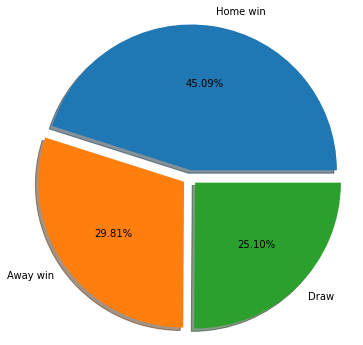

In [38]:
labels = ['Home win', 'Away win', 'Draw']

plt.figure(figsize=(6,6))
plt.pie(DATA_cleaned.FTR.value_counts(), labels=labels,
       shadow=True, explode=(0.05, 0.05, 0.05), autopct='%1.2f%%')
plt.axis('equal')
plt.show()

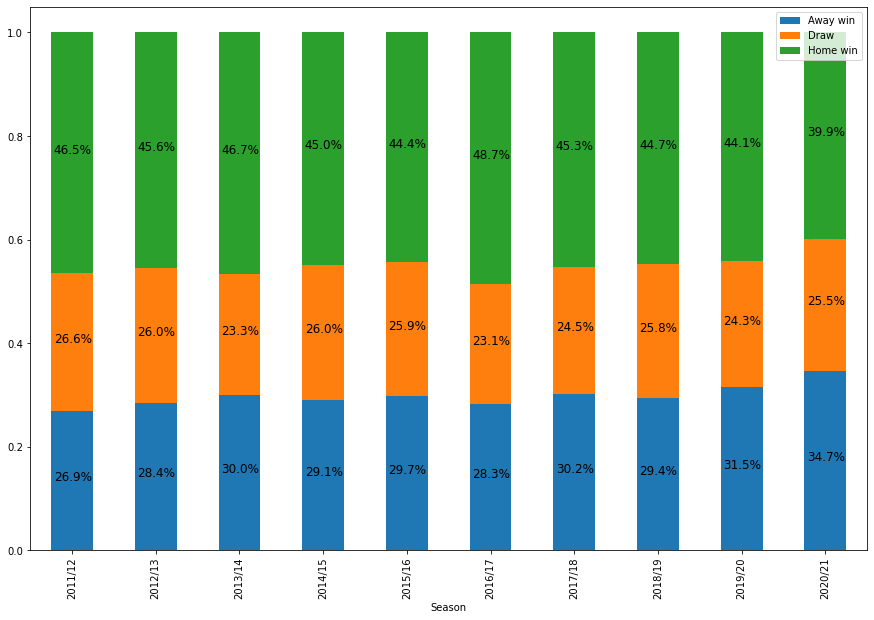

In [39]:
FTR_prop_by_Season = pd.crosstab(index=DATA_cleaned['Season'], 
                                columns=DATA_cleaned['FTR'], 
                                normalize='index')

FTR_prop_by_Season.plot(kind='bar', stacked=True, figsize=(15,10))
plt.legend(['Away win','Draw','Home win'])

for n, x in enumerate([*FTR_prop_by_Season.index.values]):
    for (proportion, y_loc) in zip(FTR_prop_by_Season.loc[x],
                                   FTR_prop_by_Season.loc[x].cumsum()):
                
        plt.text(x=n - 0.22,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12)

plt.show()

In each of the seasons, a definite advantage of own field is noticeable. In 9/10 cases it is over 44%. Only in the 2020/21 season, the share of hosts' victories fell below 40%. Perhaps this is due to covid restrictions and the lack of spectators throughout the season in the stands (they provide support for the home team).

However, It is noticeable, that home team does not lose his match in almost 70%.
Therefore, for the purposes of the analysis in a variable goal, we combine the groups 'D' and 'A', which will also cause that we will have evenly distributed classes

In [40]:
DATA_cleaned['Final_result'] = DATA_cleaned.FTR.apply(lambda x: 1 if x == 'H' else 0)

In [41]:
DATA_cleaned['Final_result'].value_counts()

0    9970
1    8187
Name: Final_result, dtype: int64

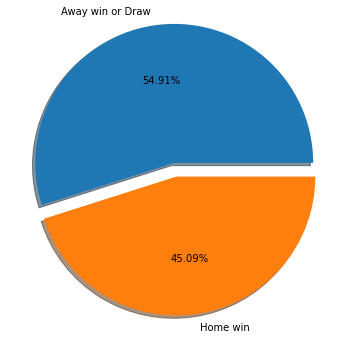

In [42]:
labels = ['Away win or Draw', 'Home win']

plt.figure(figsize=(6,6))
plt.pie(DATA_cleaned['Final_result'].value_counts(), labels=labels,
       shadow=True, explode=(0.05, 0.05), autopct='%1.2f%%')
plt.axis('equal')
plt.show()

## Modeling

In [43]:
DATA_cleaned.columns[0:8]

Index(['Div', 'Season', 'Date', 'HomeTeam', 'AwayTeam', 'FTR',
       'HT_last_matches_number', 'AT_last_matches_number'],
      dtype='object')

In [44]:
X = DATA_cleaned.iloc[:,8:] # remove unnecessary columns
y = DATA_cleaned.Final_result
X.drop('Final_result', inplace=True, axis=1)

In [45]:
binary_variables = ['HTWinStreak3', 'HTWinStreak5', 
                    'HTLossStreak3','HTLossStreak5', 
                    'ATWinStreak3', 'ATWinStreak5', 
                    'ATLossStreak3', 'ATLossStreak5', 
                    'Is_HT_newTeam', 'Is_AT_newTeam',
                    'Is_5MatchWeek']
numeric_variables = X.select_dtypes(include=['int64', 'float64']).drop(binary_variables, axis=1).columns
categorical_variables = X.select_dtypes(include=['object']).columns

Transform categorical variables to binary

In [46]:
DATA_cleaned_dummies = pd.get_dummies(data=DATA_cleaned, columns=categorical_variables)
DATA_cleaned_dummies

,Div,Season,Date,HomeTeam,AwayTeam,FTR,HT_last_matches_number,AT_last_matches_number,B365H,B365D,B365A,B365_HD,B365_AD,HT_Shots_took_Acc,AT_Shots_took_Acc,HT_Shots_allowed_Acc,AT_Shots_allowed_Acc,HT_cum_wins,AT_cum_wins,HT_cum_losses,AT_cum_losses,HT_cum_draws,AT_cum_draws,Off_strength_HT,Def_strength_HT,Off_strength_AT,Def_strength_AT,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,Is_HT_newTeam,Is_AT_newTeam,Is_5MatchWeek,Diff_TM_avg_age,Diff_TM_foreigners_number,Diff_avg_market_value_MLN_EUR,Diff_total_market_value_MLN_EUR,HT_goal_diff,AT_goal_diff,DiffPts,Diff_3match_FormPts,Diff_5match_FormPts,Diff_last_LP,H2H_Diff_Pts,HT_Pts_byMW,HT_goal_diff_byMW,AT_Pts_byMW,AT_goal_diff_byMW,Final_result,HT_last_match1_D,HT_last_match1_L,HT_last_match1_ND,HT_last_match1_W,AT_last_match1_D,AT_last_match1_L,AT_last_match1_ND,AT_last_match1_W,HT_last_match2_D,HT_last_match2_L,HT_last_match2_ND,HT_last_match2_W,AT_last_match2_D,AT_last_match2_L,AT_last_match2_ND,AT_last_match2_W,HT_last_match3_D,HT_last_match3_L,HT_last_match3_ND,HT_last_match3_W,AT_last_match3_D,AT_last_match3_L,AT_last_match3_ND,AT_last_match3_W,HT_last_match4_D,HT_last_match4_L,HT_last_match4_ND,HT_last_match4_W,AT_last_match4_D,AT_last_match4_L,AT_last_match4_ND,AT_last_match4_W,HT_last_match5_D,HT_last_match5_L,HT_last_match5_ND,HT_last_match5_W,AT_last_match5_D,AT_last_match5_L,AT_last_match5_ND,AT_last_match5_W
0,E0,2011/12,2011-08-13,Blackburn,Wolves,A,0,0,2.20,3.20,3.50,1.30,1.67,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0,0,0,0,0,0,0,0,0.0,0.0,1,0.4,2.0,0.05,1.95,0.0,0.0,0,0,0,-2.0,6,0.000000,0.000000,0.000000,0.000000,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
1,E0,2011/12,2011-08-13,Fulham,Aston Villa,D,0,0,2.20,3.20,3.50,1.30,1.67,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0,0,0,0,0,0,0,0,0.0,0.0,1,1.5,5.0,-0.56,-23.50,0.0,0.0,0,0,0,-1.0,-3,0.000000,0.000000,0.000000,0.000000,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
2,E0,2011/12,2011-08-13,Liverpool,Sunderland,D,0,0,1.57,3.60,7.00,1.09,2.38,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0,0,0,0,0,0,0,0,0.0,0.0,1,0.1,-2.0,4.13,110.40,0.0,0.0,0,0,0,-4.0,6,0.000000,0.000000,0.000000,0.000000,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
3,E0,2011/12,2011-08-13,Newcastle,Arsenal,D,0,0,3.75,3.25,2.10,1.74,1.28,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0,0,0,0,0,0,0,0,0.0,0.0,1,0.6,-14.0,-3.68,-200.73,0.0,0.0,0,0,0,8.0,0,0.000000,0.000000,0.000000,0.000000,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
4,E0,2011/12,2011-08-13,QPR,Bolton,A,0,0,2.40,3.25,3.00,1.38,1.56,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0,0,0,0,0,0,0,0,1.0,0.0,1,1.7,6.0,-0.67,-8.67,0.0,0.0,0,0,0,7.0,0,0.000000,0.000000,0.000000,0.000000,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18152,D1,2020/21,2021-05-22,Hoffenheim,Hertha,H,33,33,1.90,3.80,3.80,1.27,1.90,0.310559,0.261438,0.360544,0.349650,10.0,8.0,13.0,14.0,10.0,11.0,1.129564,1.067344,0.881719,0.903651,0,0,0,0,0,0,0,0,0.0,0.0,0,0.7,4.0,0.15,-0.73,-3.0,-10.0,5,0,0,-4.0,3,1.212121,-0.090909,1.060606,-0.303030,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0
18153,D1,2020/21,2021-05-2

In [47]:
X = DATA_cleaned_dummies.iloc[:,8:] # remove unnecessary columns
y = DATA_cleaned_dummies.Final_result
X.drop('Final_result', inplace=True, axis=1)

I decided to predict matches from one league. As a test set, we take the last 2 completed seasons of the English Premier League before the pandemic (2019/20 and 2018/19 seasons)

In [48]:
test = DATA_cleaned_dummies[(DATA_cleaned_dummies.Div == 'E0') & (DATA_cleaned_dummies.Season.isin(['2018/19','2019/20']))]
train = DATA_cleaned_dummies.drop(test.index)

In [49]:
test.shape

(760, 94)

In [50]:
X_train = train.iloc[:,8:]
X_test = test.iloc[:,8:]
y_train = train.Final_result
y_test = test.Final_result

X_train.drop('Final_result', inplace=True, axis=1)
X_test.drop('Final_result', inplace=True, axis=1)

In [51]:
print(X_train.shape)
print(y_train.shape)

(17397, 85)
(17397,)


### Feature Selection

Train and test datasets contain 85 columns (after creating dummy variables) so it is necesarry to reduce them. So I decide to use feature selection with Random Forest model with n_estimators = 1000

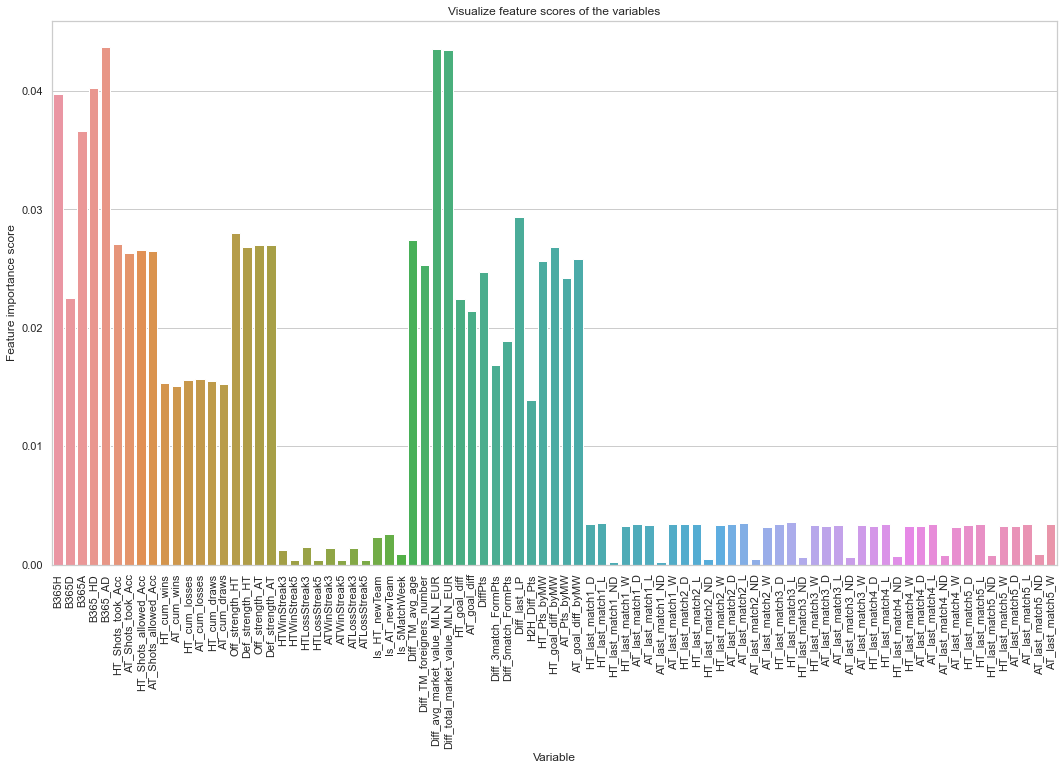

In [52]:
model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X, y)
rf = pd.DataFrame({"Variable" : X.columns,
              "Feature importance score": model.feature_importances_})
plt.figure(figsize=(18,10))
sns.set(style="whitegrid")
ax = sns.barplot(x="Variable", y="Feature importance score", data=rf)
plt.title('Visualize feature scores of the variables')
for label in ax.get_xticklabels():
    label.set_rotation(90)

Variables, with feature importance score under 0.01 , are binary variables

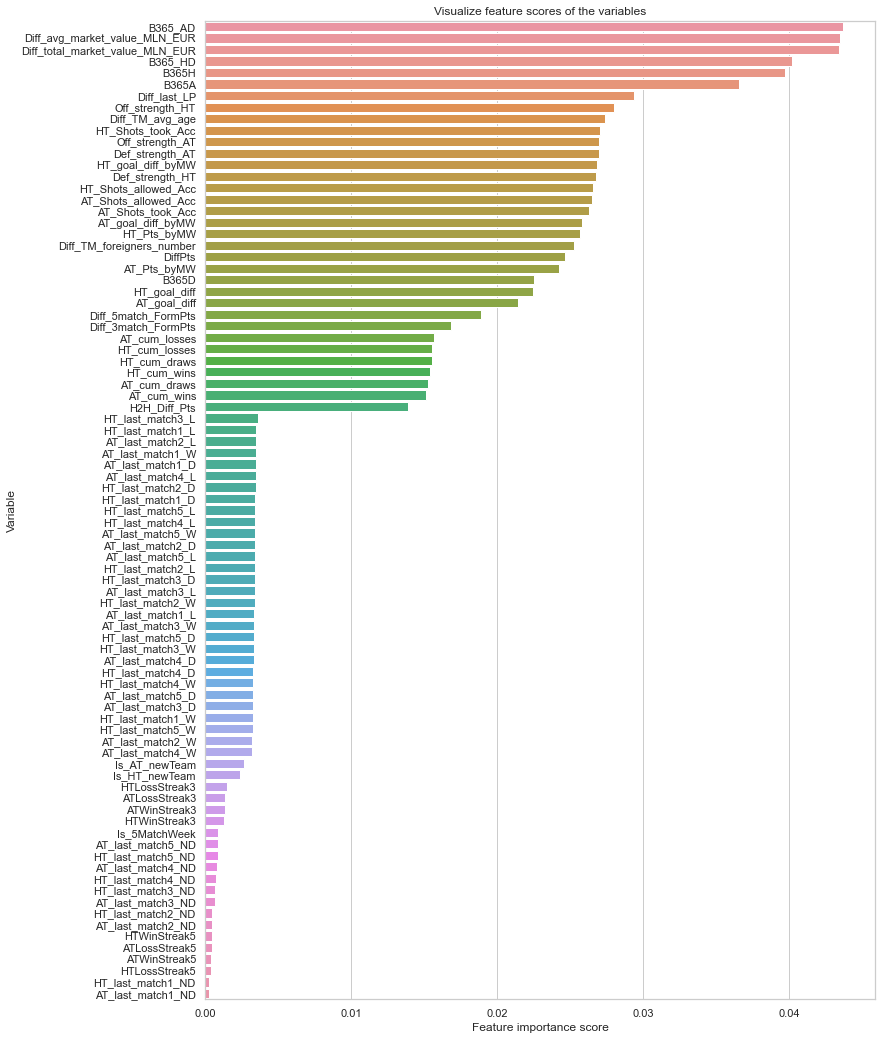

In [53]:
# Sorted plot
feature_scores = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
f, ax = plt.subplots(figsize=(12, 18))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the variables")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Variable")
plt.show()

In [54]:
rf[rf['Feature importance score'] > 0.01]['Feature importance score'].sum()

0.8802843758732797

In [55]:
rf[rf['Feature importance score'] > 0.01]['Variable'].reset_index(drop=True)

0                               B365H
1                               B365D
2                               B365A
3                             B365_HD
4                             B365_AD
5                   HT_Shots_took_Acc
6                   AT_Shots_took_Acc
7                HT_Shots_allowed_Acc
8                AT_Shots_allowed_Acc
9                         HT_cum_wins
10                        AT_cum_wins
11                      HT_cum_losses
12                      AT_cum_losses
13                       HT_cum_draws
14                       AT_cum_draws
15                    Off_strength_HT
16                    Def_strength_HT
17                    Off_strength_AT
18                    Def_strength_AT
19                    Diff_TM_avg_age
20          Diff_TM_foreigners_number
21      Diff_avg_market_value_MLN_EUR
22    Diff_total_market_value_MLN_EUR
23                       HT_goal_diff
24                       AT_goal_diff
25                            DiffPts
26          

Choosing 34 variables with feature importance score over 0.01 contains 88% of all importance score. There was a reduction by over 50 variables. So I decide to filter my X_train and X_test dataset

In [56]:
X_train = X_train[list(rf[rf['Feature importance score'] > 0.01]['Variable'])]
X_test = X_test[list(rf[rf['Feature importance score'] > 0.01]['Variable'])]

In [57]:
print('Train set')
print(X_train.shape)
print(y_train.shape)
print('--------------')
print('Test set')
print(X_test.shape)
print(y_test.shape)

Train set
(17397, 34)
(17397,)
--------------
Test set
(760, 34)
(760,)


Dimension are correct but after my decision to predict matches in 2 seasons of English Premier League there is a huge difference with number of observations in train and test set. So it is necessary to us K-Fold Cross Validation to avoid overfitting on train set

In [58]:
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

### Classification Models

#### Logistic Regression

In [59]:
# Simple regression model
LR_simple_model = LogisticRegression(max_iter=2000, verbose=True, random_state=42)
LR_simple_model.fit(X_train, y_train)

y_pred = LR_simple_model.predict(X_test)
accuracy_score(y_test, y_pred)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s finished


0.6828947368421052

In [60]:
print(classification_report(y_test, y_pred))#, target_names=['Away win or draw', 'Home win']))

              precision    recall  f1-score   support

           0       0.67      0.79      0.73       407
           1       0.70      0.56      0.62       353

    accuracy                           0.68       760
   macro avg       0.69      0.67      0.67       760
weighted avg       0.69      0.68      0.68       760



In [61]:
C = stats.uniform(loc=0, scale=4)
#penalty = ['none', 'l1', 'l2', 'elasticnet']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag']

hyperparameters = dict(C=C, solver=solver)

In [62]:
# define search
LR_model = LogisticRegression(max_iter=2000)
LR_Rsearch = RandomizedSearchCV(LR_model, hyperparameters, n_iter=100, scoring='accuracy', n_jobs=-1, cv=cv, 
                                random_state=42, verbose=True)

In [63]:
# execute search
LR_tuned_model = LR_Rsearch.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % LR_tuned_model.best_score_)
print('Best Hyperparameters: %s' % LR_tuned_model.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Score: 0.656837494589871
Best Hyperparameters: {'C': 2.0990986410335566, 'solver': 'liblinear'}


In [64]:
accuracy_score(y_test, LR_tuned_model.predict(X_test))

0.6828947368421052

#### Random Forest

In [65]:
# Simple random forest model
RF_simple_model = RandomForestClassifier(n_estimators=500 ,verbose=True, random_state=42)
RF_simple_model.fit(X_train, y_train)

y_pred = RF_simple_model.predict(X_test)
accuracy_score(y_test, y_pred)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   25.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


0.6855263157894737

In [66]:
print(classification_report(y_test, y_pred))#, target_names=['Home win', 'Away win or draw']))

              precision    recall  f1-score   support

           0       0.68      0.79      0.73       407
           1       0.70      0.57      0.63       353

    accuracy                           0.69       760
   macro avg       0.69      0.68      0.68       760
weighted avg       0.69      0.69      0.68       760



In [67]:
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = stats.randint(2, 11)
min_samples_leaf = stats.randint(1, 11)
criterion = ["gini", "entropy"]

In [68]:
hyperparameters = dict(max_features=max_features, 
                       max_depth=max_depth, 
                       min_samples_split=min_samples_split,
                       min_samples_leaf=min_samples_leaf, 
                       criterion=criterion)

In [69]:
# define search
RF_model = RandomForestClassifier(n_estimators=500)
RF_Rsearch = RandomizedSearchCV(RF_model, hyperparameters, n_iter=100, scoring='accuracy', n_jobs=-1, cv=cv, 
                                random_state=42, verbose=True)

In [70]:
# execute search
RF_tuned_model = RF_Rsearch.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % RF_tuned_model.best_score_)
print('Best Hyperparameters: %s' % RF_tuned_model.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Score: 0.6601710096374636
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 4}


In [71]:
accuracy_score(y_test, RF_tuned_model.predict(X_test))

0.6815789473684211

#### XGBoost

In [72]:
XGB_simple_model = XGBClassifier(random_state=42, use_label_encoder=False)
XGB_simple_model.fit(X_train, y_train)

y_pred = XGB_simple_model.predict(X_test)
accuracy_score(y_test, y_pred)

[22:10:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.6434210526315789

In [73]:
print(classification_report(y_test, y_pred))#, target_names=['Home win', 'Away win or draw']))

              precision    recall  f1-score   support

           0       0.64      0.74      0.69       407
           1       0.64      0.53      0.58       353

    accuracy                           0.64       760
   macro avg       0.64      0.64      0.63       760
weighted avg       0.64      0.64      0.64       760



In [80]:
hyperparameters = {
    'max_depth':  [random.randint(8, 40) for i in range(30)],
    'eta': [random.uniform(0.01, 0.3) for i in range(30)],
    'subsample': [random.uniform(0.7, 1) for i in range(30)],
    'colsample_bytree': [random.uniform(0.6, 1) for i in range(30)],
    'min_child_weight': [random.randint(0, 10) for i in range(30)],
    'scale_pos_weight': [random.uniform(1, 10) for i in range(30)]
}

# hyperparameters = {
#     'max_depth':  stats.randint(8, 40),
#     'eta': stats.uniform(0.01, 0.3),
#     'subsample': stats.uniform(0.7, 1),
#     'colsample_bytree': stats.uniform(0.6, 1),
#     'min_child_weight': stats.randint(0, 10),
#     'scale_pos_weight': stats.uniform(1, 10)
# }

In [81]:
# define search
XGB_model = XGBClassifier(use_label_encoder=False, booster='gbtree', n_estimators=500)
XGB_Rsearch = RandomizedSearchCV(XGB_model, hyperparameters, n_iter=10, scoring='accuracy', n_jobs=-1, cv=cv, 
                                 random_state=42, verbose=True)
# only 10 iterations becasue of the computing power limitations and lack of time
# but I will definetely check it for more iterations

In [82]:
# execute search
XGB_tuned_model = XGB_Rsearch.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % XGB_tuned_model.best_score_)
print('Best Hyperparameters: %s' % XGB_tuned_model.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[22:24:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Score: 0.635799014117546
Best Hyperparameters: {'subsample': 0.8294755520529169, 'scale_pos_weight': 1.2342913028650289, 'min_child_weight': 3, 'max_depth': 37, 'eta': 0.13288443740032896, 'colsample_bytree': 0.6238503410774545}


In [83]:
accuracy_score(y_test, XGB_tuned_model.predict(X_test))

0.6447368421052632

## Compare Models

In [84]:
models = []
models.append(LR_simple_model)
models.append(LR_tuned_model)
models.append(RF_simple_model)
models.append(RF_tuned_model)
models.append(XGB_simple_model)
models.append(XGB_tuned_model)

In [85]:
acc_scores = {'Model':[], 'Acc_score': []}

acc_scores['Model'].append('LR_simple_model')
acc_scores['Model'].append('LR_tuned_model')
acc_scores['Model'].append('RF_simple_model')
acc_scores['Model'].append('RF_tuned_model')
acc_scores['Model'].append('XGB_simple_model')
acc_scores['Model'].append('XGB_tuned_model')

for model in models:
    acc_scores['Acc_score'].append(accuracy_score(y_test, model.predict(X_test)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


In [88]:
acc_scores_df = pd.DataFrame(acc_scores).sort_values(by='Acc_score', ascending=False)

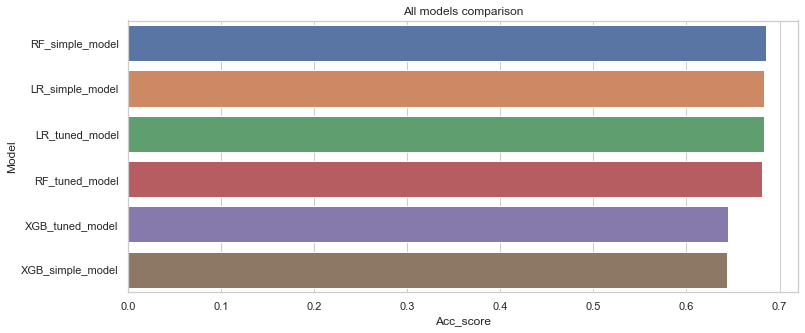

In [90]:
#feature_scores = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
f, ax = plt.subplots(figsize=(12, 5))
ax = sns.barplot(x=acc_scores_df.Acc_score, y=acc_scores_df.Model)
ax.set_title("All models comparison")
plt.show()

Based on the accuracy score the best model is the Random Forest Classifier without hyperparameter tuning. The accurasy is 68.6%

So now let's check how much money I could earn or lose by betting on the model's results. Betting strategy is to bet 100 on every single match

In [97]:
X_test_bet = X_test.copy()
X_test_bet['RF_Model_results'] = RF_simple_model.predict(X_test)
X_test_bet['True_results'] = y_test

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


In [99]:
money = []
bid = 100
    
for i, row in X_test_bet.iterrows():
    
    if row.RF_Model_results == row.True_results:
        if row.RF_Model_results == 1:
            wygrana_h = round(bid*row.B365H,2) - bid
            money.append(wygrana_h)
        else:
            wygrana_remis_a = round(bid*row.B365_AD,2) - bid
            money.append(wygrana_remis_a)
    else:
        money.append(-bid) 

In [102]:
np.sum(money)

-1289.0

The results are not satisfying because based on the model's results I could lost around 1300 money. This confirms that the results of a football match are very difficult to predict and the final result may be influenced by unmeasurable data.

## Splitting data randomly

Checking what if I split data randomly. I will use Random Forest model because it achieved the best result above

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Feature importance

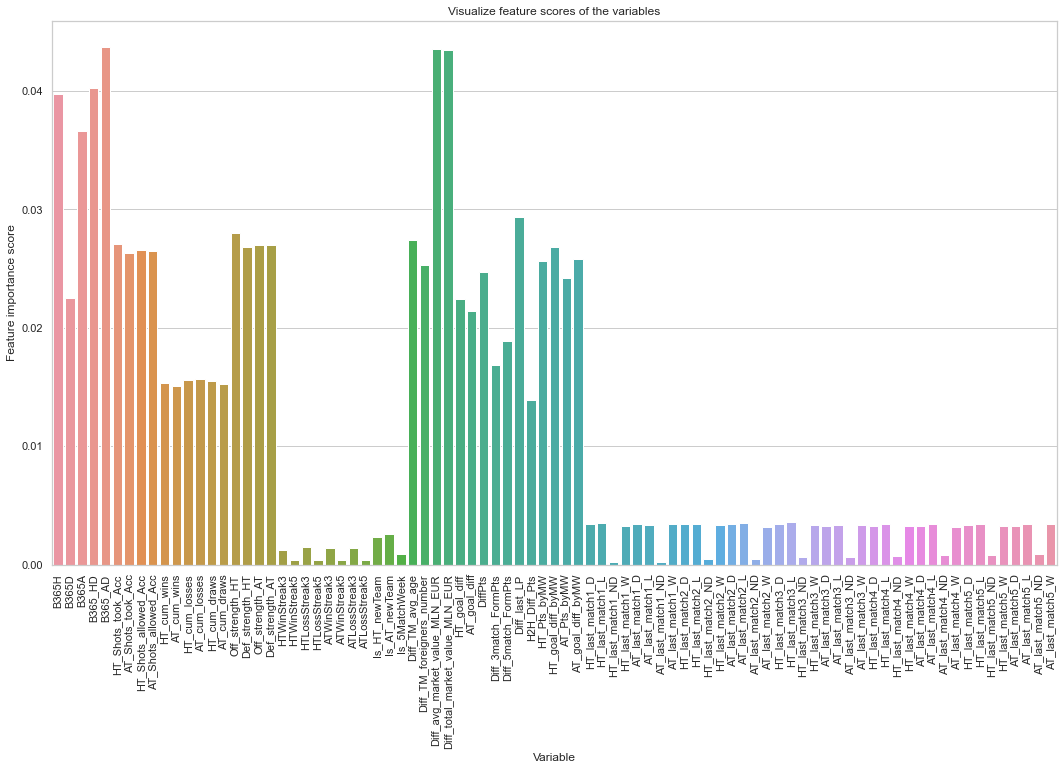

In [107]:
model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X, y)
rf = pd.DataFrame({"Variable" : X.columns,
              "Feature importance score": model.feature_importances_})
plt.figure(figsize=(18,10))
sns.set(style="whitegrid")
ax = sns.barplot(x="Variable", y="Feature importance score", data=rf)
plt.title('Visualize feature scores of the variables')
for label in ax.get_xticklabels():
    label.set_rotation(90)

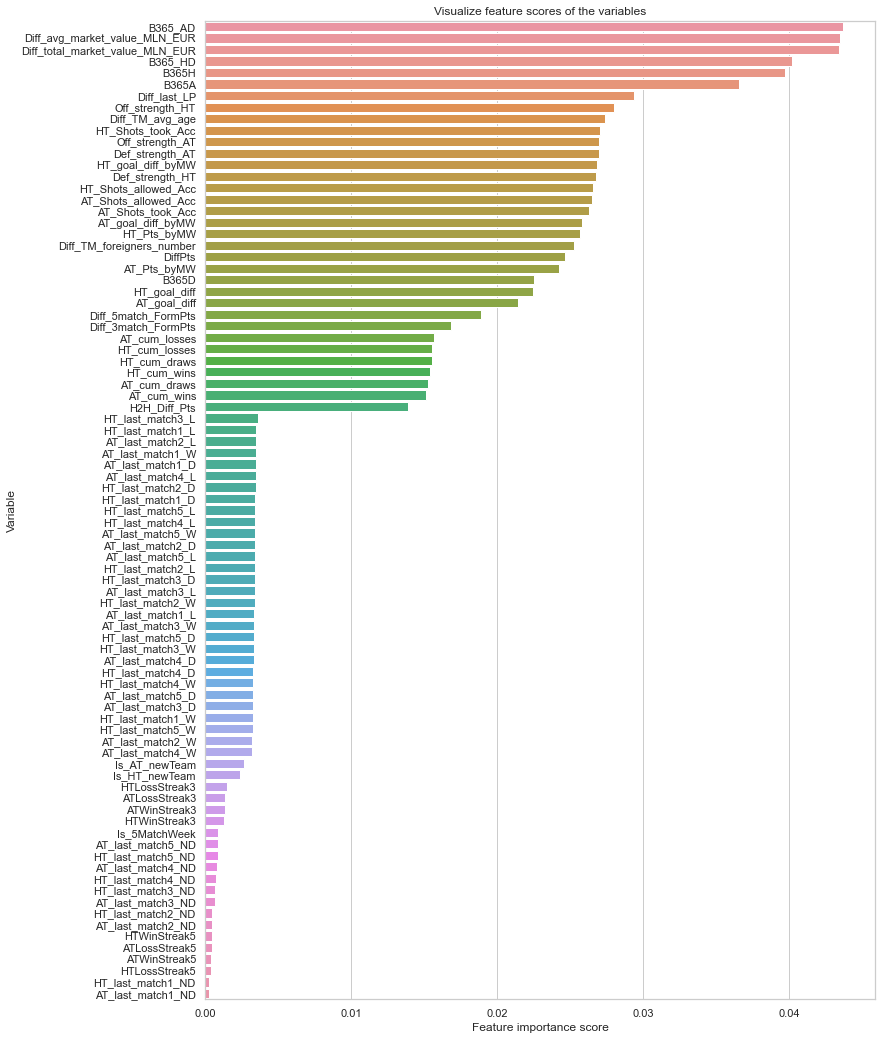

In [108]:
# Sorted plot
feature_scores = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
f, ax = plt.subplots(figsize=(12, 18))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the variables")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Variable")
plt.show()

In [109]:
rf[rf['Feature importance score'] > 0.01]['Feature importance score'].sum()

0.8802843758732797

In [110]:
rf[rf['Feature importance score'] > 0.01]['Variable'].reset_index(drop=True)

0                               B365H
1                               B365D
2                               B365A
3                             B365_HD
4                             B365_AD
5                   HT_Shots_took_Acc
6                   AT_Shots_took_Acc
7                HT_Shots_allowed_Acc
8                AT_Shots_allowed_Acc
9                         HT_cum_wins
10                        AT_cum_wins
11                      HT_cum_losses
12                      AT_cum_losses
13                       HT_cum_draws
14                       AT_cum_draws
15                    Off_strength_HT
16                    Def_strength_HT
17                    Off_strength_AT
18                    Def_strength_AT
19                    Diff_TM_avg_age
20          Diff_TM_foreigners_number
21      Diff_avg_market_value_MLN_EUR
22    Diff_total_market_value_MLN_EUR
23                       HT_goal_diff
24                       AT_goal_diff
25                            DiffPts
26          

With feature importance we have the same situation as before

In [111]:
X_train = X_train[list(rf[rf['Feature importance score'] > 0.01]['Variable'])]
X_test = X_test[list(rf[rf['Feature importance score'] > 0.01]['Variable'])]

In [112]:
# Simple random forest model
RF_simple_model = RandomForestClassifier(n_estimators=1000 ,verbose=True, random_state=42)
RF_simple_model.fit(X_train, y_train)

y_pred = RF_simple_model.predict(X_test)
accuracy_score(y_test, y_pred)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   35.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.1s finished


0.6512481644640234

The results are worse than in the case of the prediction of the results of only the English Premier League match result. This is probably due to less records in training set in this case.

## Conclusion

The results are not satisfactory but the model is definitely better than the random model. As for predicting the results of football matches, nearly 69% is a lot, however, not enough to base your betting bets on it in the long run. I will definetly continue my analysis and try some different solutions to achieve the highest possible score